# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver2 import *

# import data

In [2]:
with open("../data/TACC_indiv_contour_mcz20_2024-06-12_17-29-23.pkl", "rb") as f:
    data_mcz20 = pickle.load(f)

data_mcz20["stats"] = contour_stats(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    data_mcz20["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz20

{'omega_matrix': array([[0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        ...,
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ]]),
 'theta_matrix': array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.0625, 0.0625, 0.0625, ..., 0.0625, 0.0625, 0.0625],
        [0.125 , 0.125 , 0.125 , ..., 0.125 , 0.125 , 0.125 ],
        ...,
        [7.875 , 7.875 , 7.875 , ..., 7.875 , 7.875 , 7.875 ],
        [7.9375, 7.9375, 7.9375, ..., 7.9375, 7.9375, 7.9375],
        [8.    , 8.    , 8.    , ..., 8.    , 8.    , 8.    ]]),
 'epsilon_matrix': array([[0.22185862, 0.22185862, 0.22185862, ..., 0.22185862, 0.22185862,
         0.22185862],
        [0.22183027, 0.22181509, 0.22179748, ..., 0.21891419, 0.21889491,
         0.2188758 ],
        [0.22180176, 0.22177129, 0.22173601,

In [3]:
with open("../data/TACC_indiv_contour_mcz40_2024-06-12_17-35-25.pkl", "rb") as f:
    data_mcz40 = pickle.load(f)

data_mcz40["stats"] = contour_stats(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    data_mcz40["gammaP_min_matrix"],
    thres_factor=1.01,
    thres_diff=0,
)

data_mcz40

{'omega_matrix': array([[0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        ...,
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ],
        [0.  , 0.05, 0.1 , ..., 2.9 , 2.95, 3.  ]]),
 'theta_matrix': array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.0625, 0.0625, 0.0625, ..., 0.0625, 0.0625, 0.0625],
        [0.125 , 0.125 , 0.125 , ..., 0.125 , 0.125 , 0.125 ],
        ...,
        [7.875 , 7.875 , 7.875 , ..., 7.875 , 7.875 , 7.875 ],
        [7.9375, 7.9375, 7.9375, ..., 7.9375, 7.9375, 7.9375],
        [8.    , 8.    , 8.    , ..., 8.    , 8.    , 8.    ]]),
 'epsilon_matrix': array([[0.17484291, 0.17484291, 0.17484291, ..., 0.17484291, 0.17484291,
         0.17484291],
        [0.17474673, 0.17473983, 0.17472234, ..., 0.17229322, 0.17226217,
         0.17223262],
        [0.17464877, 0.17463564, 0.17460124,

# modify plotting function

In [4]:
def plot_indiv_contour_modified(X, Y, Z, src_params, n_levels=100):
    plt.contourf(X, Y, Z, levels=n_levels, cmap="jet")
    plt.xlabel(r"$\~\Omega$", fontsize=14)
    plt.ylabel(r"$\~\theta$", fontsize=14)
    plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
        label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", size=14
    )

    # ep_min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    # plt.scatter(X[ep_min_idx], Y[ep_min_idx], color="white", marker="o")

    # plt.suptitle(
    #     "Mismatch Between RP Templates and a Lensed Source",
    #     fontsize=16,
    #     y=1.0215,
    #     x=0.435,
    # )

    td = LensingGeo(src_params).td()
    I = LensingGeo(src_params).I()

    plt.title(
        r"$\theta_S$ = {}, $\phi_S$ = {}, $\theta_J$ = {}, $\phi_J$ = {}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} ms, $I$ = {:.3g}".format(
            angle_in_pi_format(src_params["theta_S"]),
            angle_in_pi_format(src_params["phi_S"]),
            angle_in_pi_format(src_params["theta_J"]),
            angle_in_pi_format(src_params["phi_J"]),
            r"$\mathcal{M}_{\rm s}$",
            src_params["mcz"] / solar_mass,
            r"$M_{\odot}$",
            td * 1000,
            I,
        ),
        # fontsize=12,
        # y=1.021,
    )

# make plots for $\mathcal{M_{\rm s}}$ = 20 $M_{\odot}$

In [41]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = 20 * solar_mass

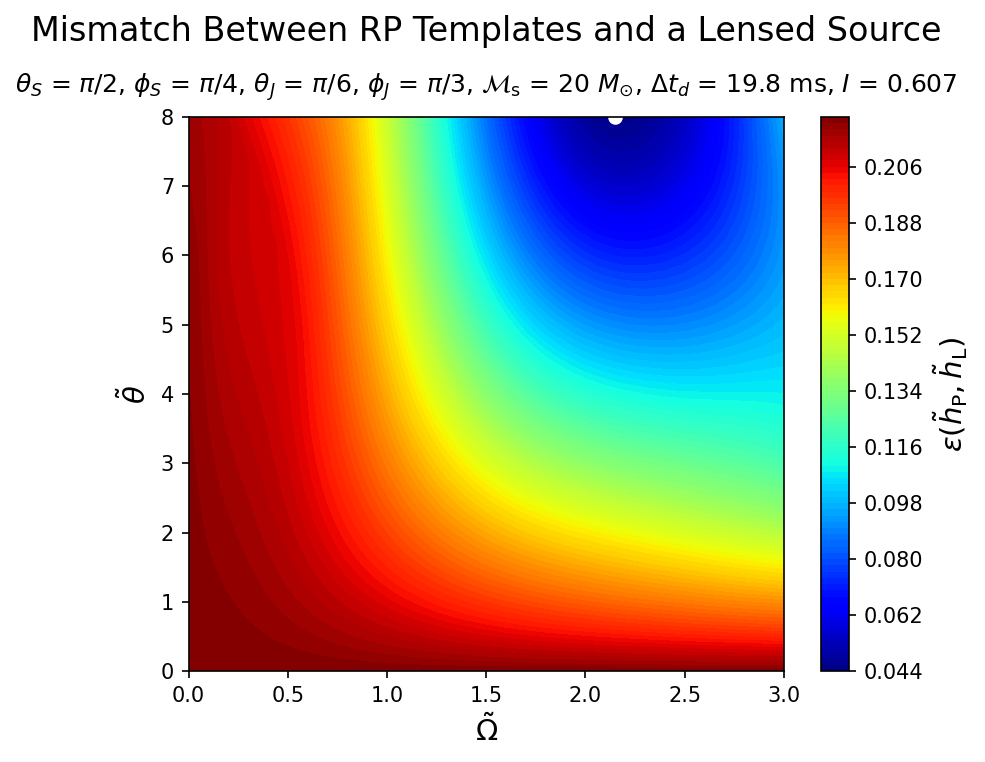

In [42]:
plot_indiv_contour(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    lens_params,
)

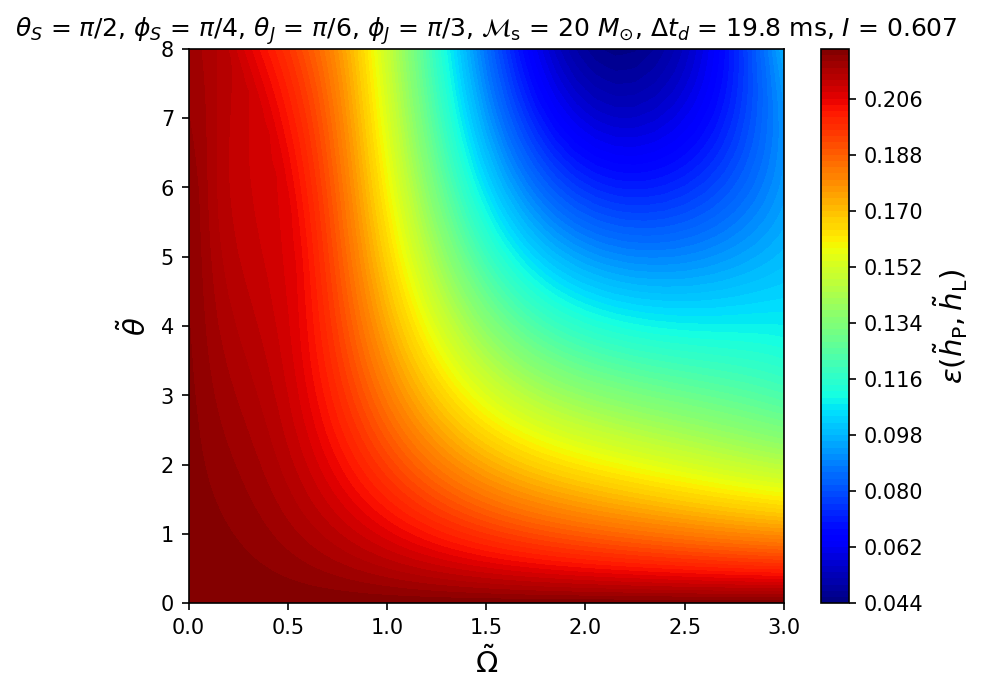

In [43]:
plot_indiv_contour_modified(
    data_mcz20["omega_matrix"],
    data_mcz20["theta_matrix"],
    data_mcz20["epsilon_matrix"],
    lens_params,
)

plt.savefig("../figures/contour_mcz20.pdf", bbox_inches="tight")

# make plots for $\mathcal{M_{\rm s}}$ = 40 $M_{\odot}$

In [8]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = 40 * solar_mass

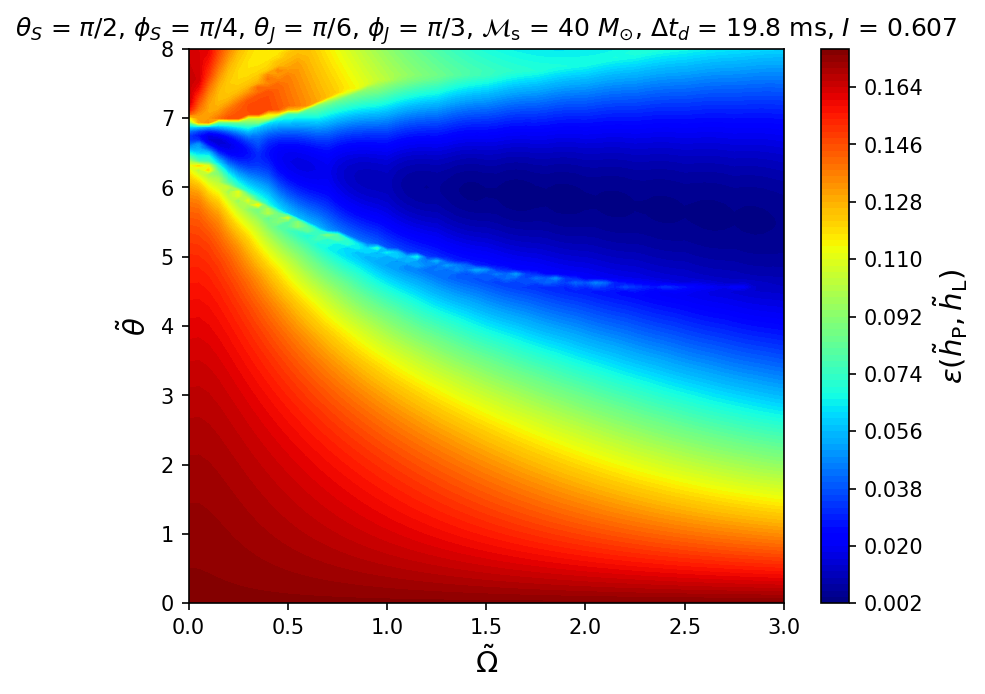

In [9]:
plot_indiv_contour_modified(
    data_mcz40["omega_matrix"],
    data_mcz40["theta_matrix"],
    data_mcz40["epsilon_matrix"],
    lens_params,
)

plt.savefig("../figures/contour_mcz40.pdf", bbox_inches="tight")

# waveform comparison

idx = -1.91655e-09, phi = -4.96471e-09, both should be ~0 if get_updated_mismatch_results is True


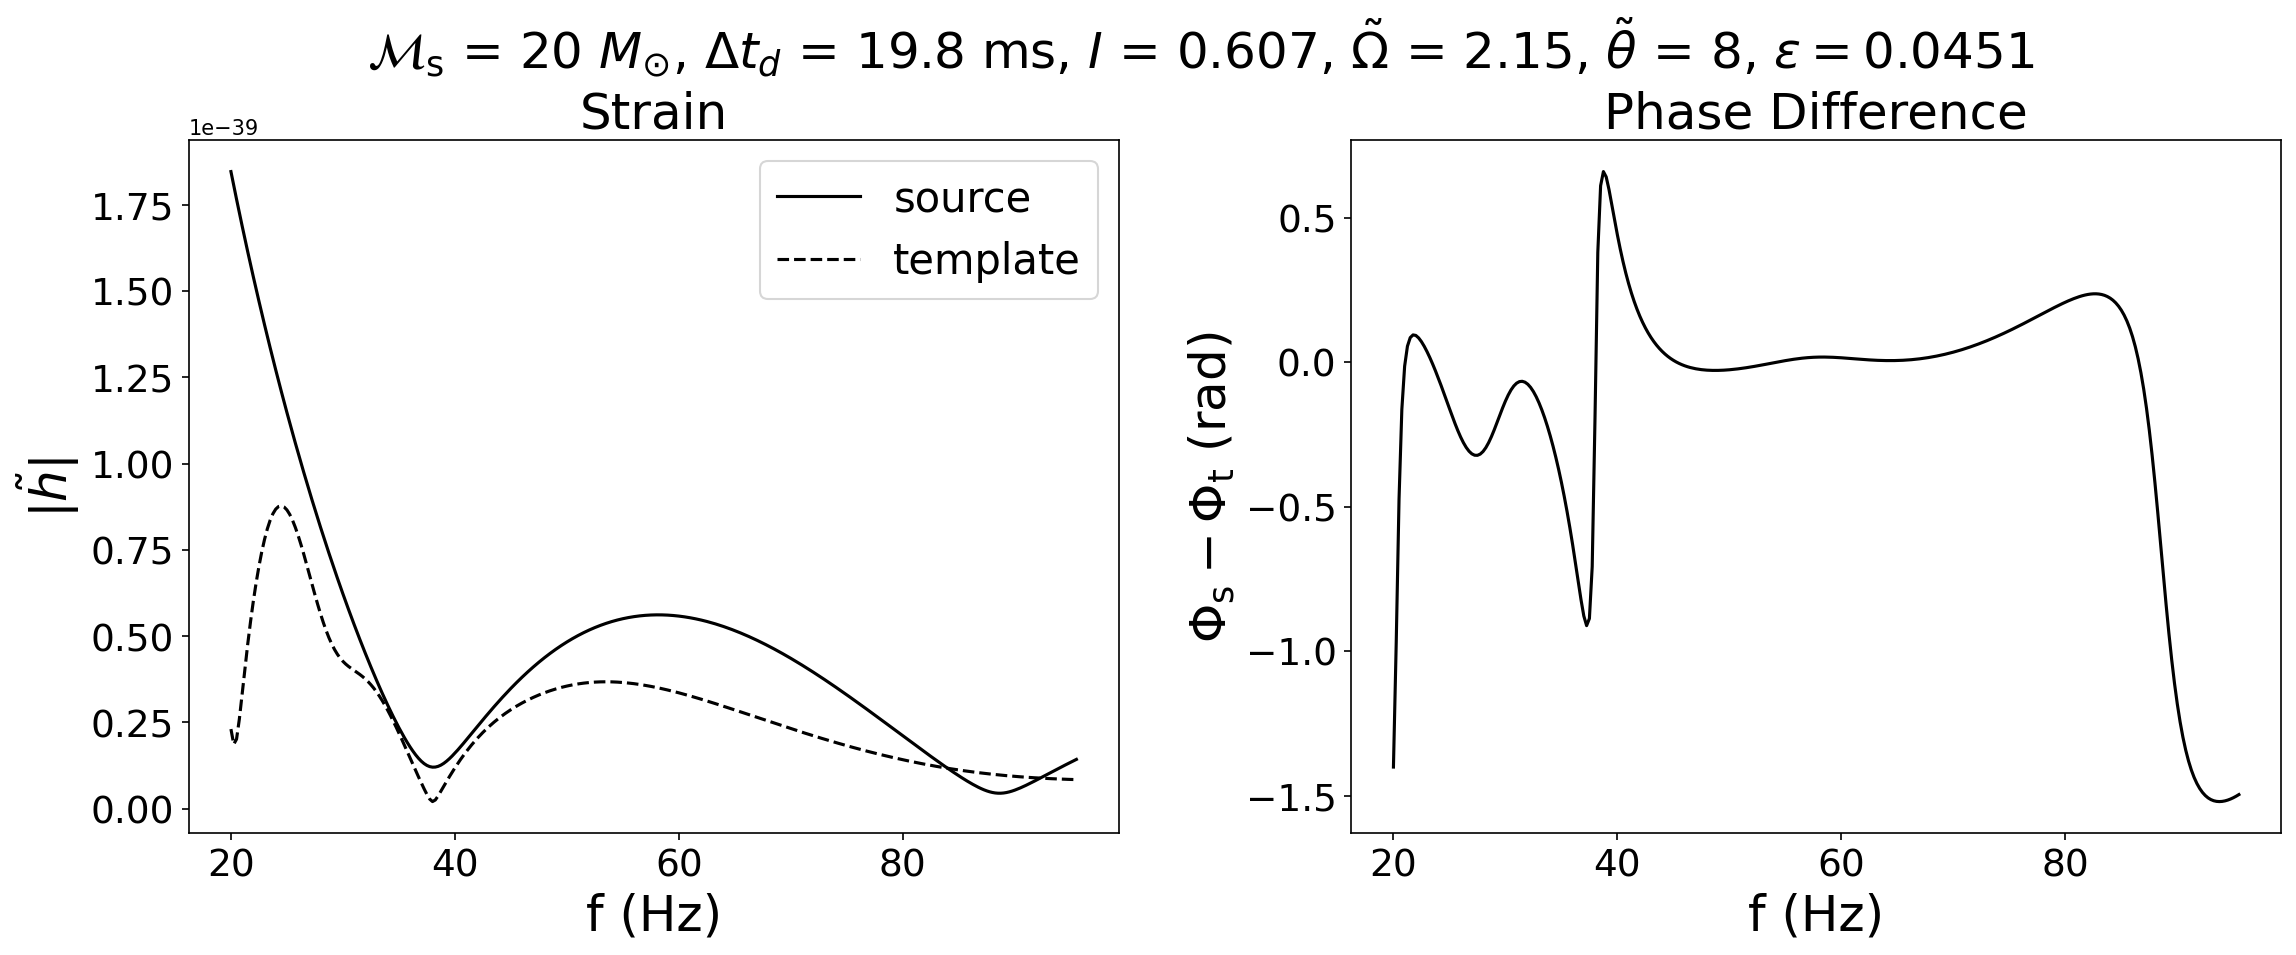

In [36]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
RP_params["omega_tilde"] = 2.15
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 5.204254496855819

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz20_best.pdf", bbox_inches="tight")

idx = 2.01494e-08, phi = 1.20986e-08, both should be ~0 if get_updated_mismatch_results is True


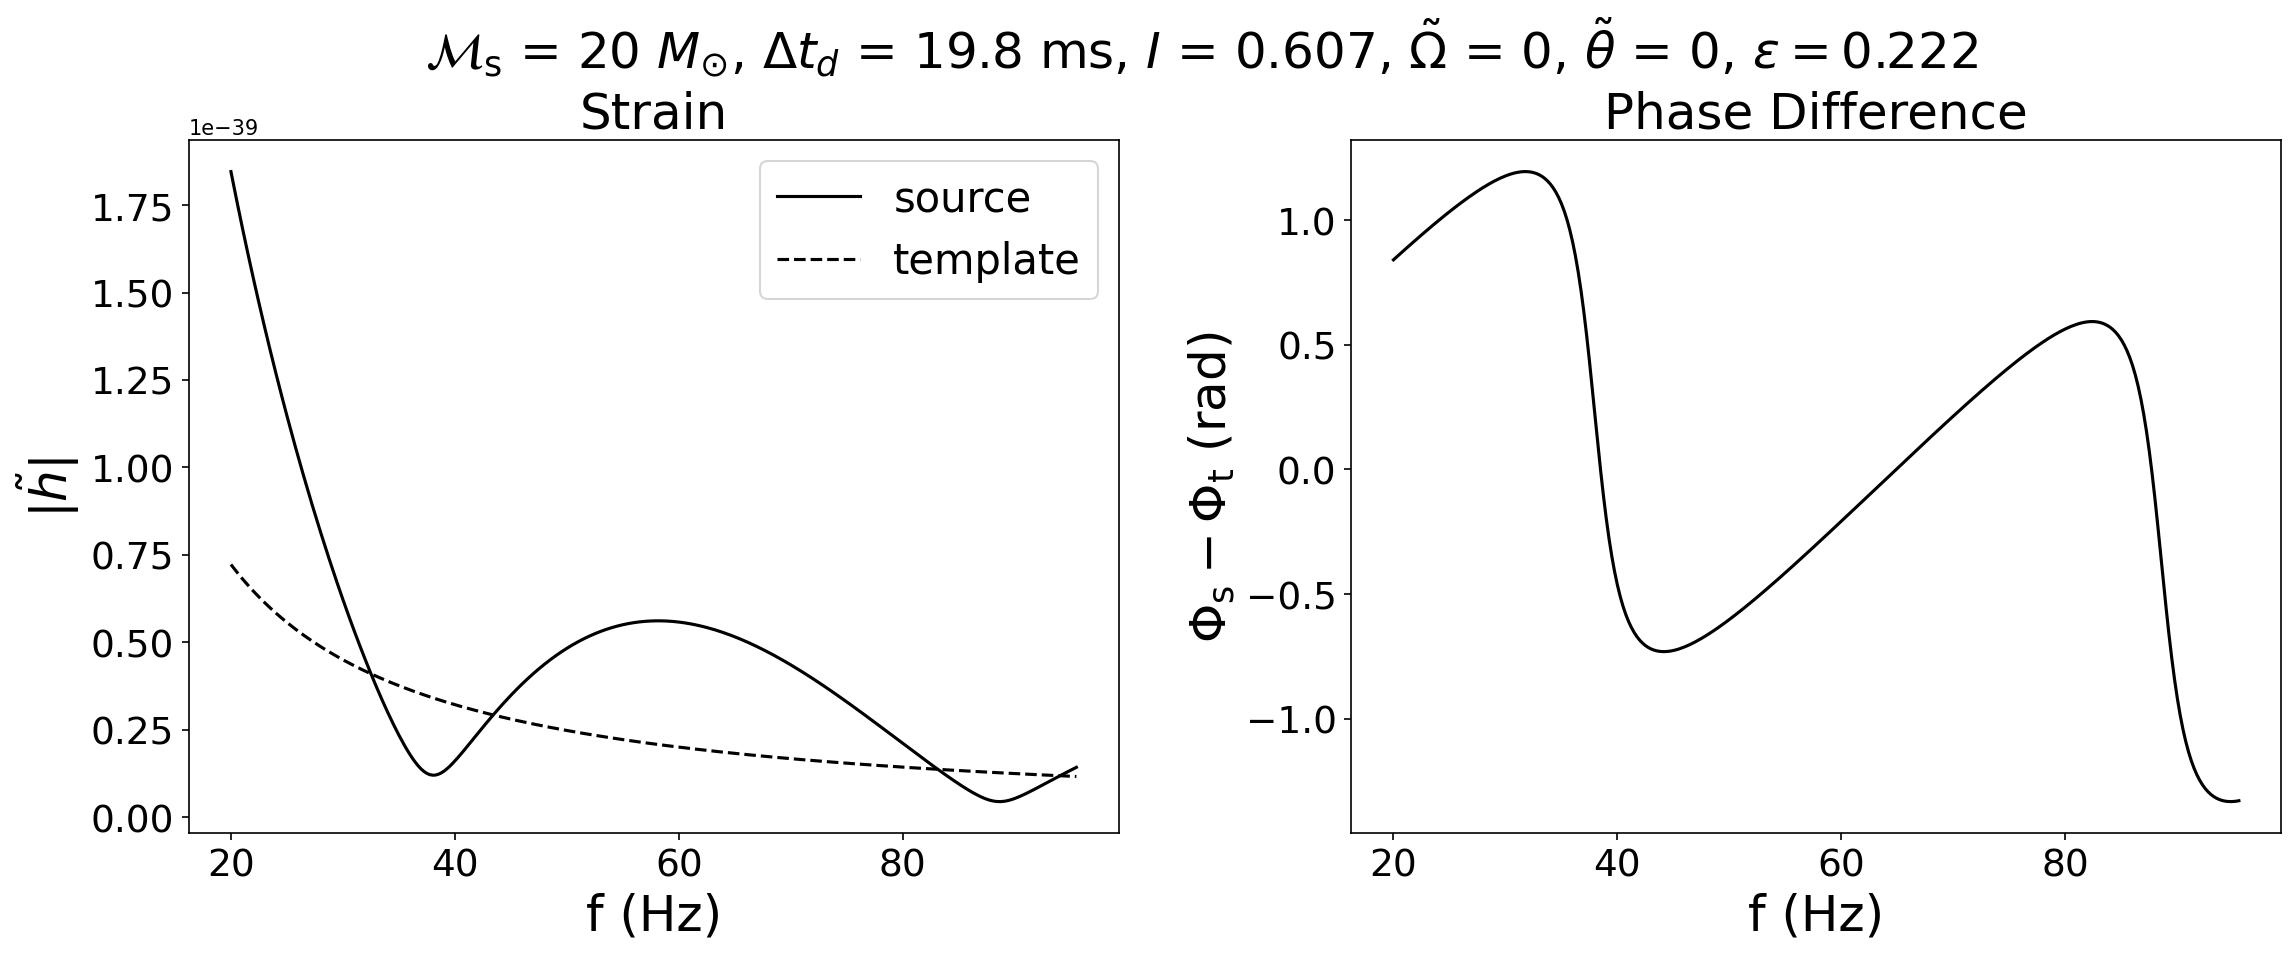

In [37]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = RP_params["mcz"] = 20 * solar_mass
RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz20_worst.pdf", bbox_inches="tight")

idx = 1.29637e-09, phi = 5.94298e-09, both should be ~0 if get_updated_mismatch_results is True


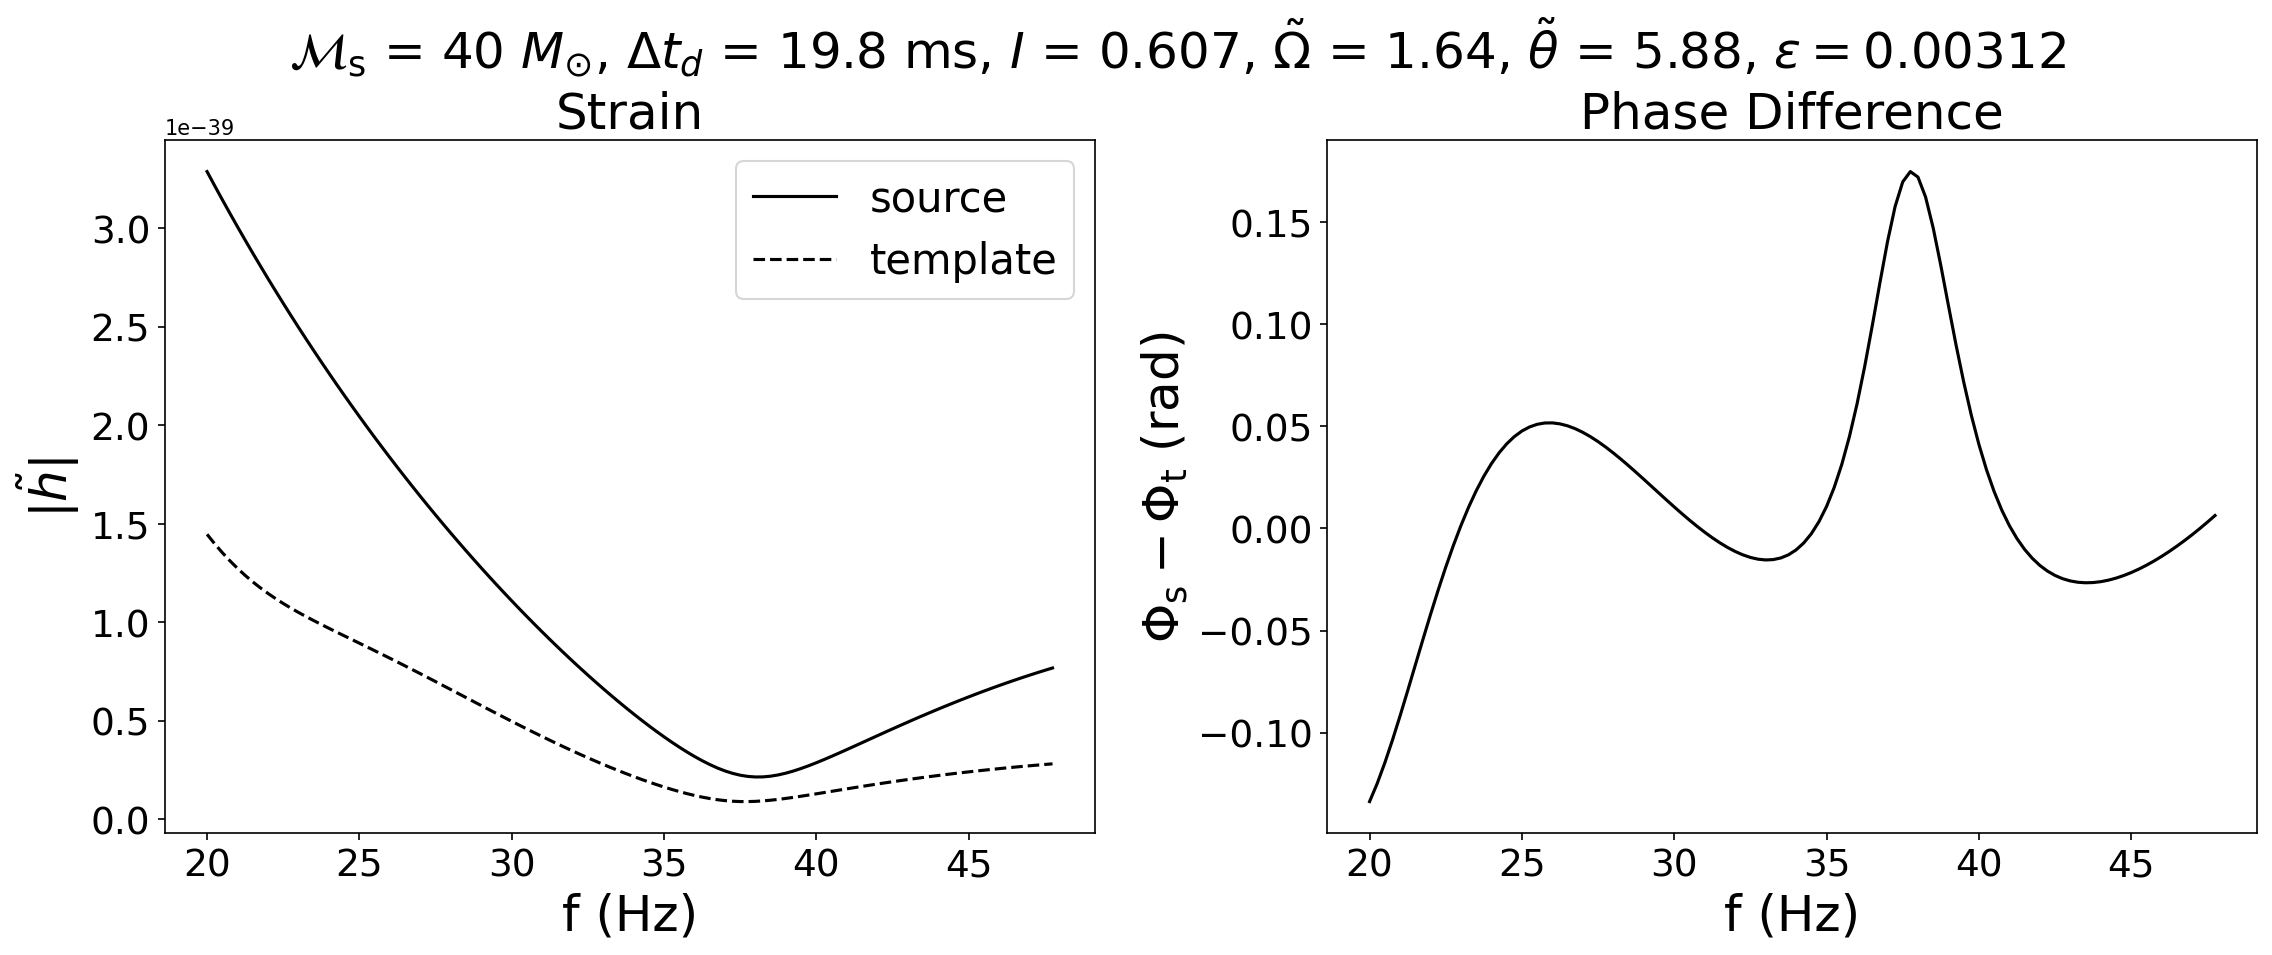

In [38]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
RP_params["omega_tilde"] = 1.64
RP_params["theta_tilde"] = 5.875
RP_params["gamma_P"] = 2.982926357953945

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz40_best.pdf", bbox_inches="tight")

idx = 8.54524e-09, phi = -1.36508e-08, both should be ~0 if get_updated_mismatch_results is True


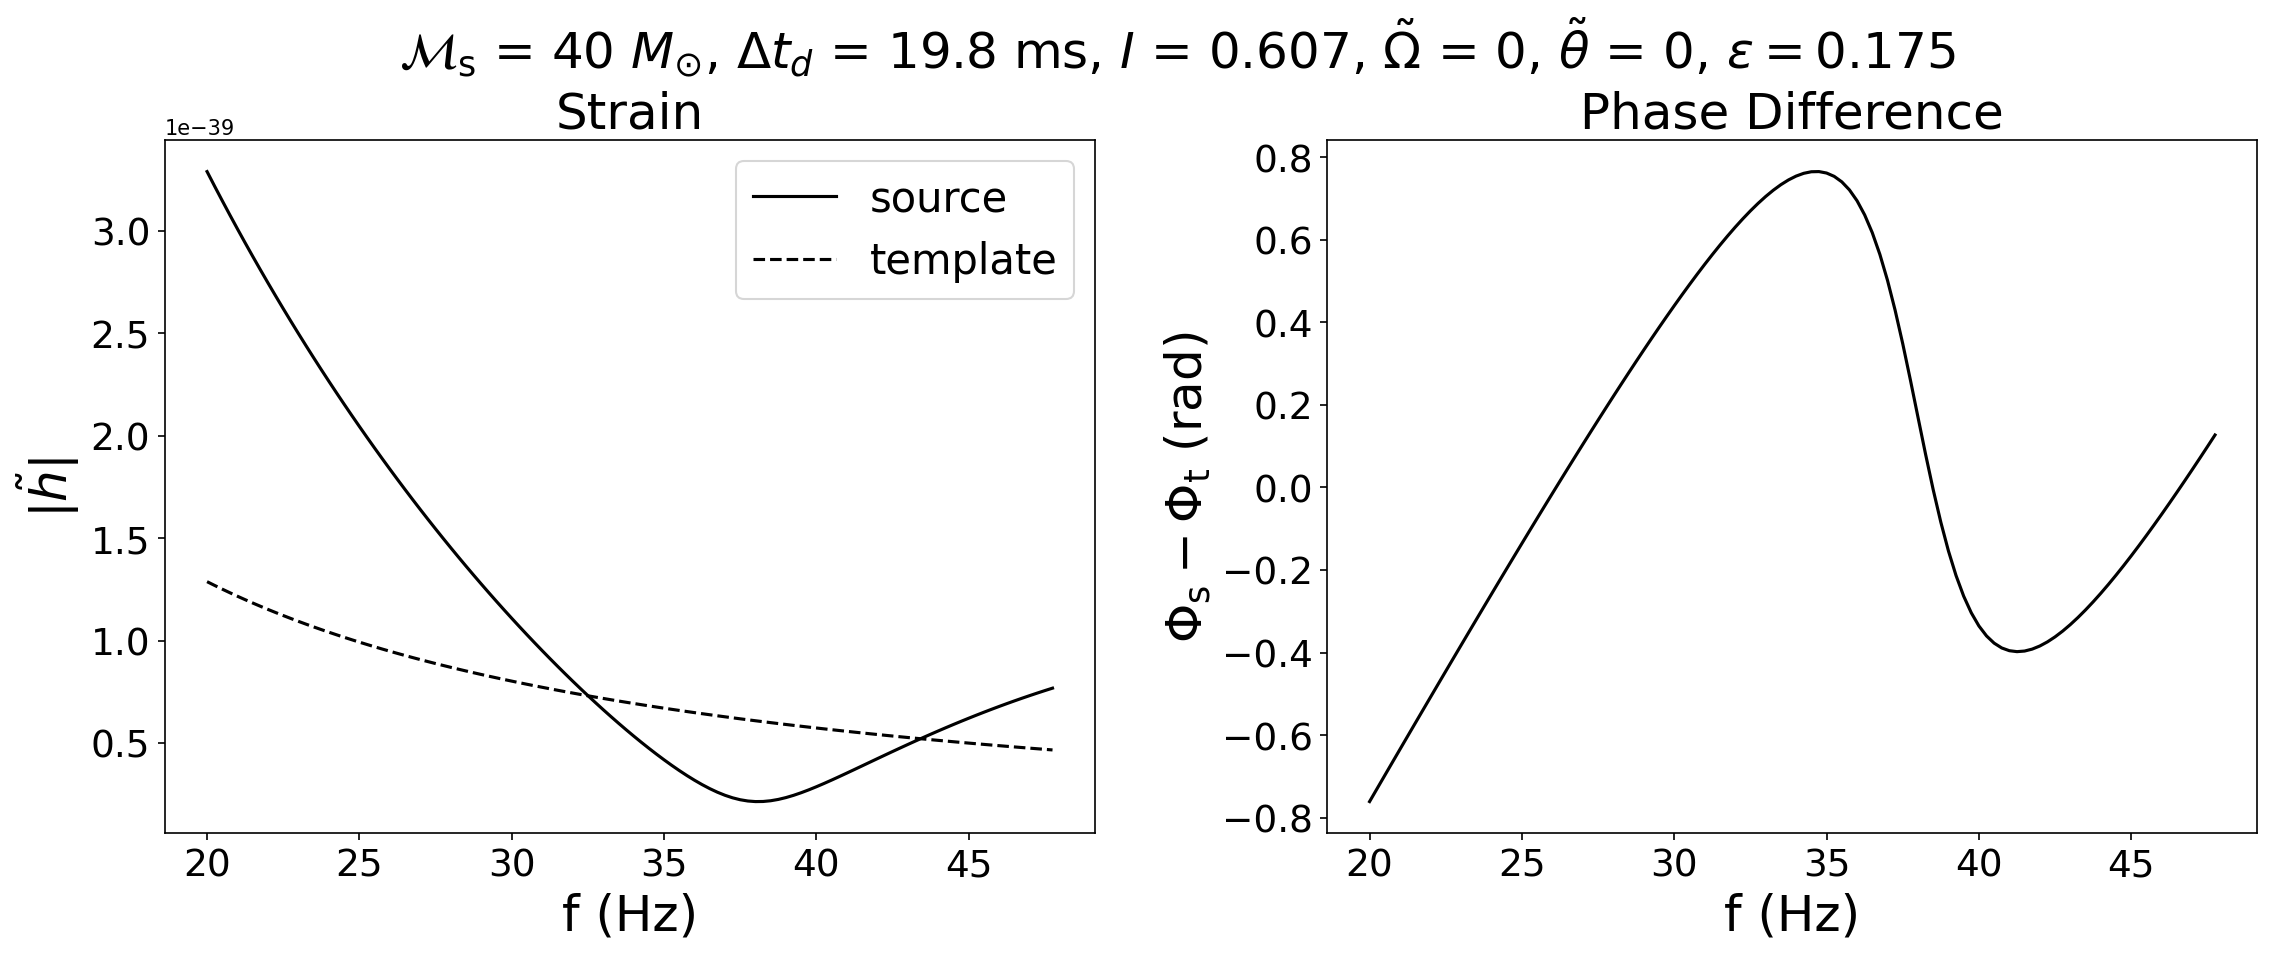

In [39]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
lens_params["mcz"] = RP_params["mcz"] = 40 * solar_mass
RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
plt.savefig("../figures/template_mcz40_worst.pdf", bbox_inches="tight")